# KDAJ SE USTAVITI

## 1. UVOD
V spodnjem poročilu predstavim problem sekretarke in njene razširitve.

## 2. Problem iskanja neveste

### Osnovni problem

Uvozimo naše potencialne neveste, ki smo jih oštevilčili od 1 - 100. (Kjer 1 predstavlja najslabšo izbiro in 100 najbolšo).

In [68]:
import pandas as pd
import random
pd.options.display.max_rows = 15 #zaradi preglednosti nastavimo max št. vrstic na 15
n = 100 # število kandidatk
m = 10000 #kolikokrat poženemo proces iskanja najbolšega partnerja

tabela_partnerjev = {}
for i in range(m):
    partnerji = list(range(1,n+1))
    random.shuffle(partnerji)
    tabela_partnerjev[i] = partnerji

Definiramo funkcijo NajbolšiPartner

In [69]:
def NajbolsiPartner(partnerji, stop):
    """Funkcija, ki vrne izbranega partnerja izmed partnerjev, 
    če smo smo jih zavračali do stop partnerja."""
    # partnerji ... seznam partnerjev
    # stop ... kdaj nehamo zavračati vse partnerje 

    vzorec = partnerji[:stop] #vključno s stop
    poroka = partnerji[stop:]

    najbolši = 0 
    za_vedno = 0
    for partner in vzorec:
        if (partner > najbolši):
            najbolši = partner
   
    for partner in poroka:
        if (partner > najbolši):
            za_vedno = partner
            break
   
    return za_vedno

In [70]:
vsota = 0 
for i in range(m):
    if NajbolsiPartner(tabela_partnerjev[i], round(n * 0.36787944)) == n :
        vsota += 1

print(vsota/m)

0.3715


Zgornja številka ponazarja; s kolikšnim procentom smo se poročili z najbolšo nevesto.

Sedaj bomo preverili, če je zgoraj uporabljen 1/e res najbolša točka ustavitve.

In [71]:
vsotke = [0] * n
for stop in range(n):
    for i in range(m):
        if NajbolsiPartner(tabela_partnerjev[i], stop) == n :
            vsotke[stop] += 1

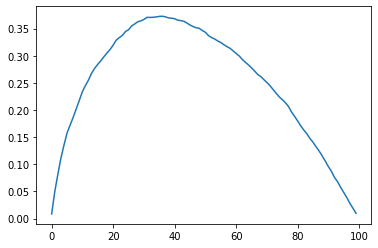

In [72]:
import matplotlib.pyplot as plt

verjetnosti = [x / m for x in vsotke]
x = [i for i in range(n)]

plt.plot(x, verjetnosti)
plt.show()

In [73]:
import numpy as np
np.argmax(vsotke)

36

S tem smo potrdili, da se nam res najbol splača ustaviti pri približno 37 partnerju.

Kaj pa, če zmanjšamo število kandidatov na 4? Ali pa na 20, 30, 50, 500, 1000? Ali naše pravilo $$max = round(n * 0.36787944)$$ še vedno drži?


## 3 
Is there a distinction when considering individuals of equal suitability, and does this affect our results? Moreover, does our outcome differ depending on whether we strictly prefer a superior candidate or are content with someone ranking equally to candidates we’ve previously encountered?